In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [8]:
cnn = tf.keras.models.Sequential()

In [14]:
import tensorflow as tf

# Create the CNN model
cnn = tf.keras.models.Sequential()

# Add layers to the model
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Continue adding layers as needed...


In [16]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [18]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [20]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [22]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [26]:
cnn.add(tf.keras.layers.Flatten())


In [30]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [32]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [36]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))  # Added the closing parenthesis


In [40]:
import tensorflow as tf

# Compile the model with the standard Adam optimizer
cnn.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Removed 'legacy'
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [42]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [44]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1036s 469ms/step - accuracy: 0.3134 - loss: 2.4366 - val_accuracy: 0.7944 - val_loss: 0.6436
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1016s 463ms/step - accuracy: 0.8022 - loss: 0.6298 - val_accuracy: 0.8922 - val_loss: 0.3465
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1004s 457ms/step - accuracy: 0.8925 - loss: 0.3426 - val_accuracy: 0.9328 - val_loss: 0.2140
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1071s 488ms/step - accuracy: 0.9245 - loss: 0.2335 - val_accuracy: 0.9445 - val_loss: 0.1688
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1005s 457ms/step - accuracy: 0.9473 - loss: 0.1636 - val_accuracy: 0.9558 - val_loss: 0.1333
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 985s 448ms/step - accuracy: 0.9574 - loss: 0.1326 - val_accuracy: 0.9560 - val_loss: 0.1385
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 989s 450ms/step - accuracy: 0.9665 - loss: 0.0999 - val_accuracy: 0.9643 - val_loss: 0.1137
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 995s 453ms/step

In [46]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 240s 109ms/step - accuracy: 0.9882 - loss: 0.0351
Training accuracy: 0.9892168641090393


In [48]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 55s 100ms/step - accuracy: 0.9711 - loss: 0.1040
Validation accuracy: 0.9694400429725647


In [50]:
cnn.save('trained_plant_disease_model.keras')

In [52]:
training_history.history #Return Dictionary of history

{'accuracy': [0.5204780101776123,
  0.8322924971580505,
  0.9027384519577026,
  0.9307347536087036,
  0.9498399496078491,
  0.9589444398880005,
  0.9682480692863464,
  0.9722597599029541,
  0.9764421582221985,
  0.9789743423461914],
 'loss': [1.6381468772888184,
  0.5349858403205872,
  0.30752745270729065,
  0.21298791468143463,
  0.1547398716211319,
  0.12731841206550598,
  0.09758520871400833,
  0.08599788695573807,
  0.07157464325428009,
  0.06476867944002151],
 'val_accuracy': [0.7943887710571289,
  0.8921579718589783,
  0.9328477382659912,
  0.9444571137428284,
  0.9557819366455078,
  0.956009566783905,
  0.9643182158470154,
  0.9632369875907898,
  0.9679604172706604,
  0.9694400429725647],
 'val_loss': [0.6436493396759033,
  0.34646347165107727,
  0.2139987349510193,
  0.16883154213428497,
  0.13329410552978516,
  0.1384589970111847,
  0.11366846412420273,
  0.11166973412036896,
  0.11315465718507767,
  0.10722411423921585]}

In [54]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)
    

In [56]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


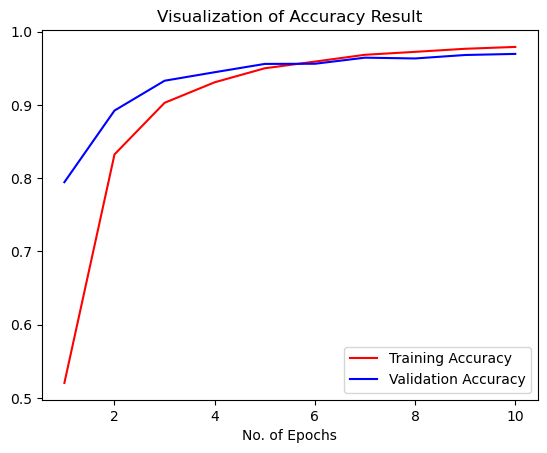

In [58]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [60]:
class_name = validation_set.class_names

In [62]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [64]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 178s 10ms/step


In [66]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [68]:
Y_true


<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [70]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [72]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [74]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.92      0.95       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.96      1.00      0.98       440
                                   Apple___healthy       0.87      1.00      0.93       502
                               Blueberry___healthy       1.00      0.97      0.98       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.94      0.95       410
                       Corn_(maize)___Common_rust_       1.00      0.99      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.95      0.98      0.

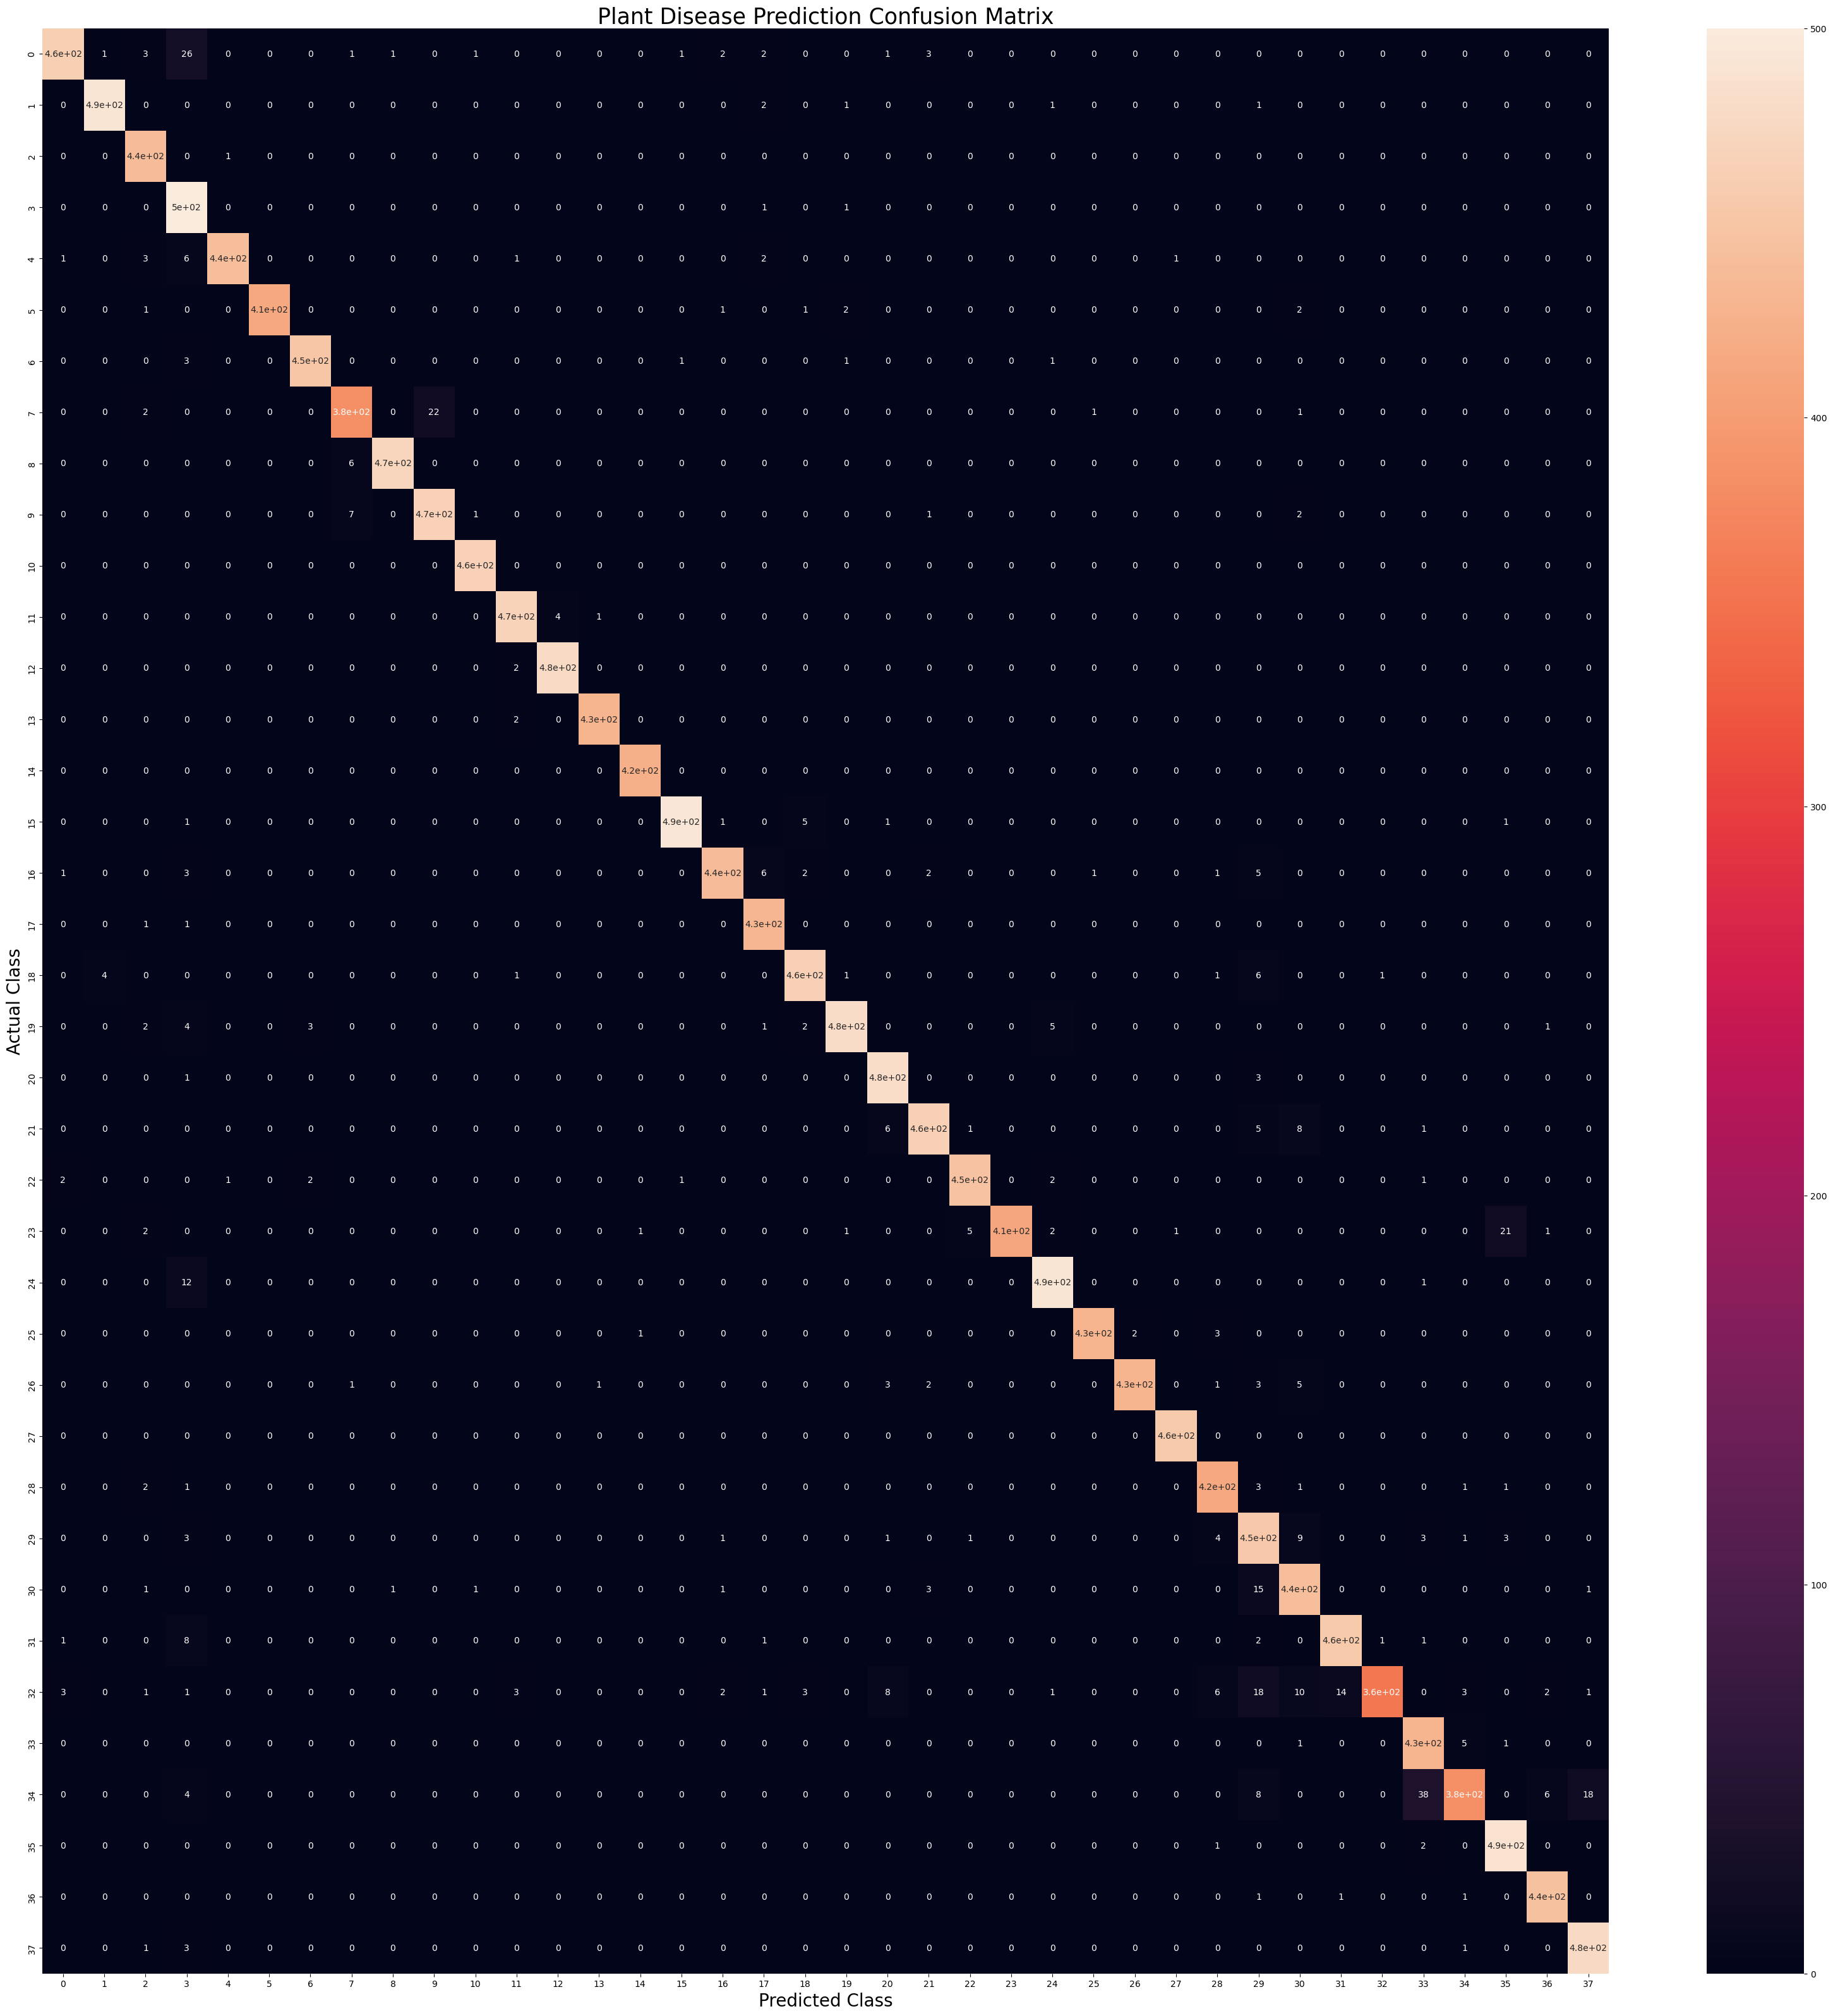

In [76]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()